In [236]:
import os
import datetime
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [237]:
os.chdir (r'C:\Users\samart\Documents\clg internship\major project')

In [238]:
ds = pd.read_csv("data_car.csv")
ds.head(4)


,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00


In [239]:
x=ds.iloc[:, :-1]
y=ds.iloc[:, -1]
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size = 0.3,random_state = 42)

In [240]:
x

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,7.88 Lakh
6015,6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,NaN
6016,6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,NaN
6017,6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,NaN


In [241]:
make_train = xtrain["Name"].str.split(" ", expand = True)
make_test = xtest["Name"].str.split(" ", expand = True)
xtrain["Manufacturer"] = make_train[0]
xtest["Manufacturer"] = make_test[0]

Text(0, 0.5, 'Count of cars')

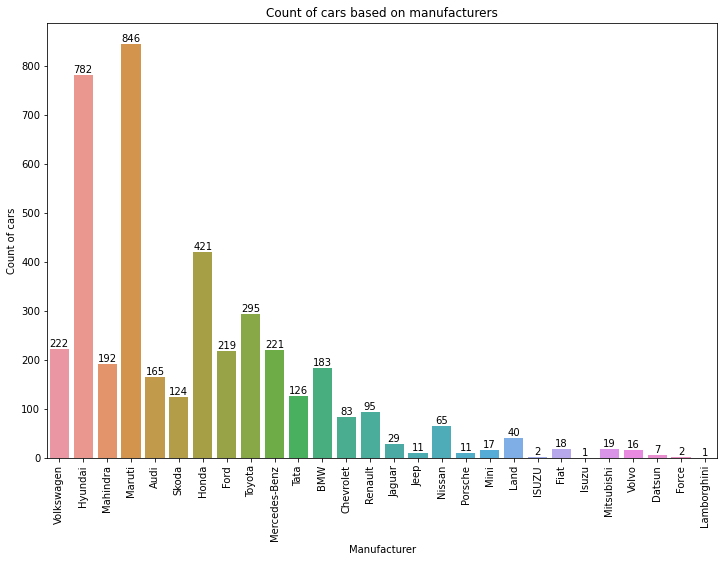

In [242]:
plt.figure(figsize = (12, 8))
plot = sns.countplot(x = 'Manufacturer', data = xtrain)
plt.xticks(rotation = 90)
for p in plot.patches:
    plot.annotate(p.get_height(), 
                        (p.get_x() + p.get_width() / 2.0, 
                         p.get_height()), 
                        ha = 'center', 
                        va = 'center', 
                        xytext = (0, 5),
                        textcoords = 'offset points')

plt.title("Count of cars based on manufacturers")
plt.xlabel("Manufacturer")
plt.ylabel("Count of cars")

In [243]:
xtrain.drop("Name", axis = 1, inplace = True)
xtest.drop("Name", axis = 1, inplace = True)

xtrain.drop("Location", axis = 1, inplace = True)
xtest.drop("Location", axis = 1, inplace = True)

In [244]:
curr_time = datetime.datetime.now()
xtrain['Year'] = xtrain['Year'].apply(lambda x : curr_time.year - x)
xtest['Year'] = xtest['Year'].apply(lambda x : curr_time.year - x)

In [245]:
mileage_train = xtrain["Mileage"].str.split(" ", expand = True)
mileage_test = xtest["Mileage"].str.split(" ", expand = True)

xtrain["Mileage"] = pd.to_numeric(mileage_train[0], errors = 'coerce')
xtest["Mileage"] = pd.to_numeric(mileage_test[0], errors = 'coerce')

In [246]:
print(sum(xtrain["Mileage"].isnull()))
print(sum(xtest["Mileage"].isnull()))

1
1


In [247]:
xtrain["Mileage"].fillna(xtrain["Mileage"].astype("float64").mean(), inplace = True)
xtest["Mileage"].fillna(xtrain["Mileage"].astype("float64").mean(), inplace = True)

In [248]:
cc_train = xtrain["Engine"].str.split(" ", expand = True)
cc_test = xtest["Engine"].str.split(" ", expand = True)
xtrain["Engine"] = pd.to_numeric(cc_train[0], errors = 'coerce')
xtest["Engine"] = pd.to_numeric(cc_test[0], errors = 'coerce')

bhp_train = xtrain["Power"].str.split(" ", expand = True)
bhp_test = xtest["Power"].str.split(" ", expand = True)
xtrain["Power"] = pd.to_numeric(bhp_train[0], errors = 'coerce')
xtest["Power"] = pd.to_numeric(bhp_test[0], errors = 'coerce')
xtrain["Engine"].fillna(xtrain["Engine"].astype("float64").mean(), inplace = True)
xtest["Engine"].fillna(xtrain["Engine"].astype("float64").mean(), inplace = True)

xtrain["Power"].fillna(xtrain["Power"].astype("float64").mean(), inplace = True)
xtest["Power"].fillna(xtrain["Power"].astype("float64").mean(), inplace = True)

xtrain["Seats"].fillna(xtrain["Seats"].astype("float64").mean(), inplace = True)
xtest["Seats"].fillna(xtrain["Seats"].astype("float64").mean(), inplace = True)

In [249]:
xtrain.drop("New_Price", axis = 1, inplace = True)
xtest.drop("New_Price", axis = 1, inplace = True)

In [250]:
xtrain=pd.get_dummies(xtrain,columns=["Manufacturer","Fuel_Type","Transmission","Owner_Type"], drop_first=True)
xtest=pd.get_dummies(xtest,columns=["Manufacturer","Fuel_Type","Transmission","Owner_Type"], drop_first=True)


In [251]:
missing_cols = set (xtrain.columns) - set (xtest.columns)
for col in missing_cols:
    xtest[col] = 0
xtest = xtest[xtrain.columns]

In [252]:
ss=StandardScaler()
ss.fit(xtrain)
xtrain=ss.transform(xtrain)
xtest=ss.transform(xtest)

In [253]:
rf=RandomForestRegressor(n_estimators =100)
rf.fit(xtrain,ytrain)
pred=rf.predict(xtest)
r2_score(ytest,pred)

0.8824715993670533

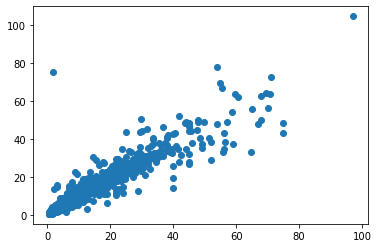

In [254]:
plt.scatter(ytest,pred)


In [256]:
linearRegression = LinearRegression()
linearRegression.fit(xtrain, ytrain)
y_pred = linearRegression.predict(xtest)
r2_score(ytest, y_pred)


0.7004287702566634

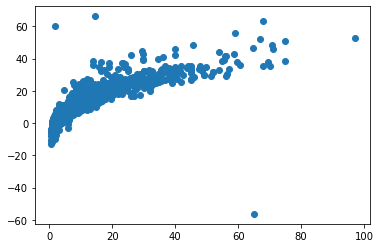

In [257]:
plt.scatter(ytest,y_pred)